# G10 Ví dụ: Mô phỏng P-value

## Mục đích

Trong ví dụ này, chúng ta sẽ sử dụng tính năng thêm chữ và tô màu, kết hợp với các hàm trong thư viện `scipy`.


## Bài toán

Các bạn có thể tìm hiểu thêm về p-value trong [video này của mình](https://www.youtube.com/watch?v=7k4TmQcHSZE). Chúng ta sẽ giải quyết bài toán sau:

Chọn mẫu ngẫu nhiên 50 người cao tuổi ở Hà Nội, đo được huyết áp tâm thu trung bình là 120 mmHg (SD 30 mmHg). Chúng ta sẽ so sánh con số trung bình này với trung bình quần thể giả thuyết là 110 mmHg, sử dụng kiểm định giả thuyết bằng p-value. Chúng ta sẽ đặt mức sai lầm loại I $\alpha=0.05$.

$$
\left\{
    \begin{array}{cc}
    H_0: & \mu = 110 \\
    H_a: & \mu > 110
    \end{array}
\right.
$$


## Giải pháp

Trước hết, chúng ta cần tính sai số chuẩn (standard error, SE):

$$
\sigma_{\bar{X}} = \frac{s_x}{\sqrt{n}}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

m, s, n = 120, 30, 50
pop_mean = 110
alpha = .05

se = s / np.sqrt(n)
print(se)

4.242640687119285


Dựa theo định lí giới hạn trung tâm, chúng ta sẽ vẽ đồ thị mật độ xác suất của phân bố của trung bình mẫu khi $H_0$ đúng, với trung bình là trung bình quần thể giả thuyết (110 mmHg) và độ lệch chuẩn là SE vừa tính được.

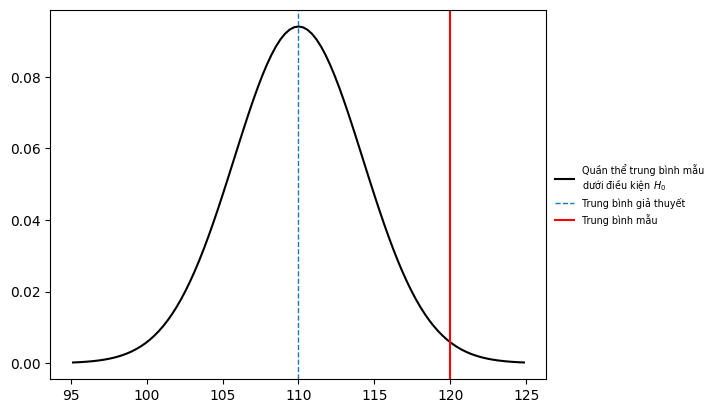

In [2]:
X = np.linspace(pop_mean - 3.5 * se, pop_mean + 3.5 * se, 101, True)
rv = stats.norm(loc=pop_mean, scale=se)
Y = rv.pdf(X)

plt.plot(X, Y, color="k", label="Quần thể trung bình mẫu\ndưới điều kiện $H_0$")
plt.axvline(pop_mean, ls="--", lw=1, label="Trung bình giả thuyết")
plt.axvline(m, color="r", label="Trung bình mẫu")
plt.legend(frameon=False, fontsize="x-small", loc="center left", bbox_to_anchor=[1, .5])
plt.show()

P-value được định nghĩa là:

$$
\text{p} = P(\bar{x} > m|H_0)
$$

Chúng ta sẽ tô màu cho phần diện tích dưới đường cong thể hiện định nghĩa này.

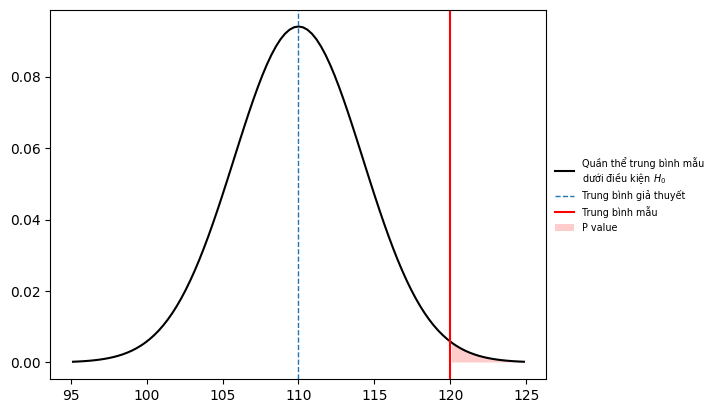

In [3]:
X_p_fill = X[np.where(X > m)]
Y_p_fill = Y[np.where(X > m)]

plt.plot(X, Y, color="k", label="Quần thể trung bình mẫu\ndưới điều kiện $H_0$")
plt.axvline(pop_mean, ls="--", lw=1, label="Trung bình giả thuyết")
plt.axvline(m, color="r", label="Trung bình mẫu")
plt.fill_between(X_p_fill, [0] * len(X_p_fill), Y_p_fill, fc="red", alpha=.2, label="P value")
plt.legend(frameon=False, fontsize="x-small", loc="center left", bbox_to_anchor=[1, .5])
plt.show()

Để kiểm định giả thuyết bằng P-value, chúng ta cần thể hiện giá trị $\alpha$ ở trên biểu đồ.

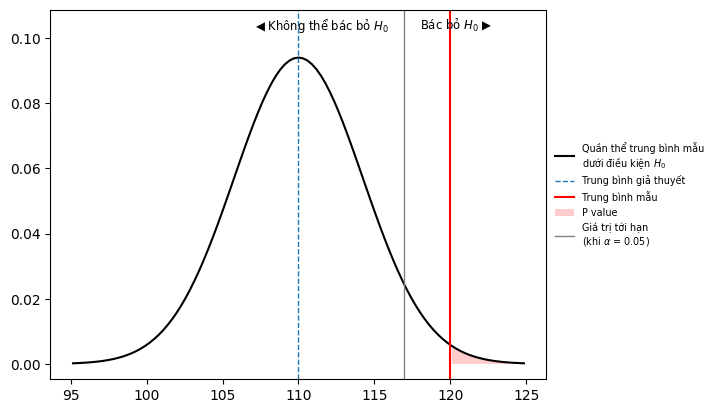

In [4]:
x_alpha = rv.ppf(1 - alpha)

plt.plot(X, Y, color="k", label="Quần thể trung bình mẫu\ndưới điều kiện $H_0$")
plt.axvline(pop_mean, ls="--", lw=1, label="Trung bình giả thuyết")
plt.axvline(m, color="r", label="Trung bình mẫu")
plt.fill_between(X_p_fill, [0] * len(X_p_fill), Y_p_fill, fc="red", alpha=.2, label="P value")

plt.axvline(x_alpha, color="gray", lw=1,
            label=f"Giá trị tới hạn\n(khi $\\alpha$ = {alpha})")

y_min, y_max = plt.ylim()
y_max += .01
plt.ylim(y_min, y_max)
plt.annotate("Bác bỏ $H_0$ ▶️", xy=(x_alpha + 1, y_max - .002),
             va="top", fontsize="small")
plt.annotate("◀️ Không thể bác bỏ $H_0$", xy=(x_alpha - 1, y_max - .002),
             ha="right", va="top", fontsize="small")

plt.legend(frameon=False, fontsize="x-small", loc="center left", bbox_to_anchor=[1, .5])
plt.show()

## Sai lầm loại II

Bạn cũng có thể biểu diễn xác suất sai lầm loại II vào biểu đồ trên.

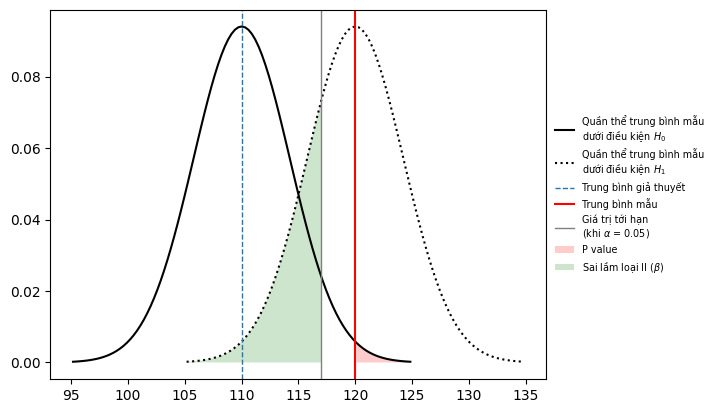

In [5]:
X1 = np.linspace(m - 3.5 * se, m + 3.5 * se, 101, True)
rv1 = stats.norm(loc=m, scale=se)
Y1 = rv1.pdf(X1)
eps = 7 * se / 101  # Thêm một khoảng chênh lệch nhỏ để đảm bảo miền tô màu bao gồm x_alpha
X_beta_fill = X1[np.where(X1 <= x_alpha + eps)]
Y_beta_fill = Y1[np.where(X1 <= x_alpha + eps)]


plt.plot(X, Y, color="k", label="Quần thể trung bình mẫu\ndưới điều kiện $H_0$")
plt.plot(X1, Y1, color="k", ls=":", label="Quần thể trung bình mẫu\ndưới điều kiện $H_1$")

plt.axvline(pop_mean, ls="--", lw=1, label="Trung bình giả thuyết")
plt.axvline(m, color="r", label="Trung bình mẫu")
plt.axvline(x_alpha, color="gray", lw=1,
            label=f"Giá trị tới hạn\n(khi $\\alpha$ = {alpha})")

plt.fill_between(X_p_fill, [0] * len(X_p_fill), Y_p_fill, fc="red", alpha=.2, label="P value")
plt.fill_between(X_beta_fill, [0] * len(X_beta_fill), Y_beta_fill,
                 fc="green", alpha=.2, label="Sai lầm loại II ($\\beta$)")

plt.legend(frameon=False, fontsize="x-small", loc="center left", bbox_to_anchor=[1, .5])
plt.show()

---

[Bài trước](./09_ci.ipynb) - [Danh sách bài](../README.md) - [Bài sau](./11_tornado.ipynb)